<a href="https://colab.research.google.com/github/saswata121924/Analysis_of_the_significance_of_handwashing/blob/main/Analysis_of_the_significance_of_handwashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np

In [65]:
import seaborn as sns

In [66]:
import plotly.express as px
import matplotlib.pyplot as plt

In [67]:
import scipy.stats as stats

In [68]:
import pandas as pd

df_yearly = pd.read_csv("annual_deaths_by_clinic.csv")
df_monthly = pd.read_csv("monthly_deaths.csv")
display(df_yearly.shape)
display(df_monthly.shape)

(12, 4)

(98, 3)

In [69]:
display(df_yearly.columns)
display(df_monthly.columns)

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

Index(['date', 'births', 'deaths'], dtype='object')

In [70]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [71]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [72]:
df_monthly["date"] = pd.to_datetime(df_monthly["date"])
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [73]:
df_yearly["year"].values

array([1841, 1842, 1843, 1844, 1845, 1846, 1841, 1842, 1843, 1844, 1845,
       1846])

In [74]:
df_yearly.isna().values.any()

False

In [75]:
df_monthly.isna().values.any()

False

In [76]:
df_yearly.duplicated().any()

False

In [77]:
df_monthly.duplicated().any()

False

In [78]:
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [79]:
df_yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [80]:
print(f"Chance of dying in the 1840s in Vienna was: {round(df_yearly.deaths.sum()/df_yearly.births.sum()*100,2)}")

Chance of dying in the 1840s in Vienna was: 7.08


In [81]:
death_per_month = df_monthly.groupby("date", as_index=False).agg({"deaths":pd.Series.sum, "births":pd.Series.sum})
display(death_per_month)

,date,deaths,births
0,1841-01-01,37,254
1,1841-02-01,18,239
2,1841-03-01,12,277
3,1841-04-01,4,255
4,1841-05-01,2,255
...,...,...,...
93,1848-11-01,9,310
94,1848-12-01,5,373
95,1849-01-01,9,403
96,1849-02-01,12,389


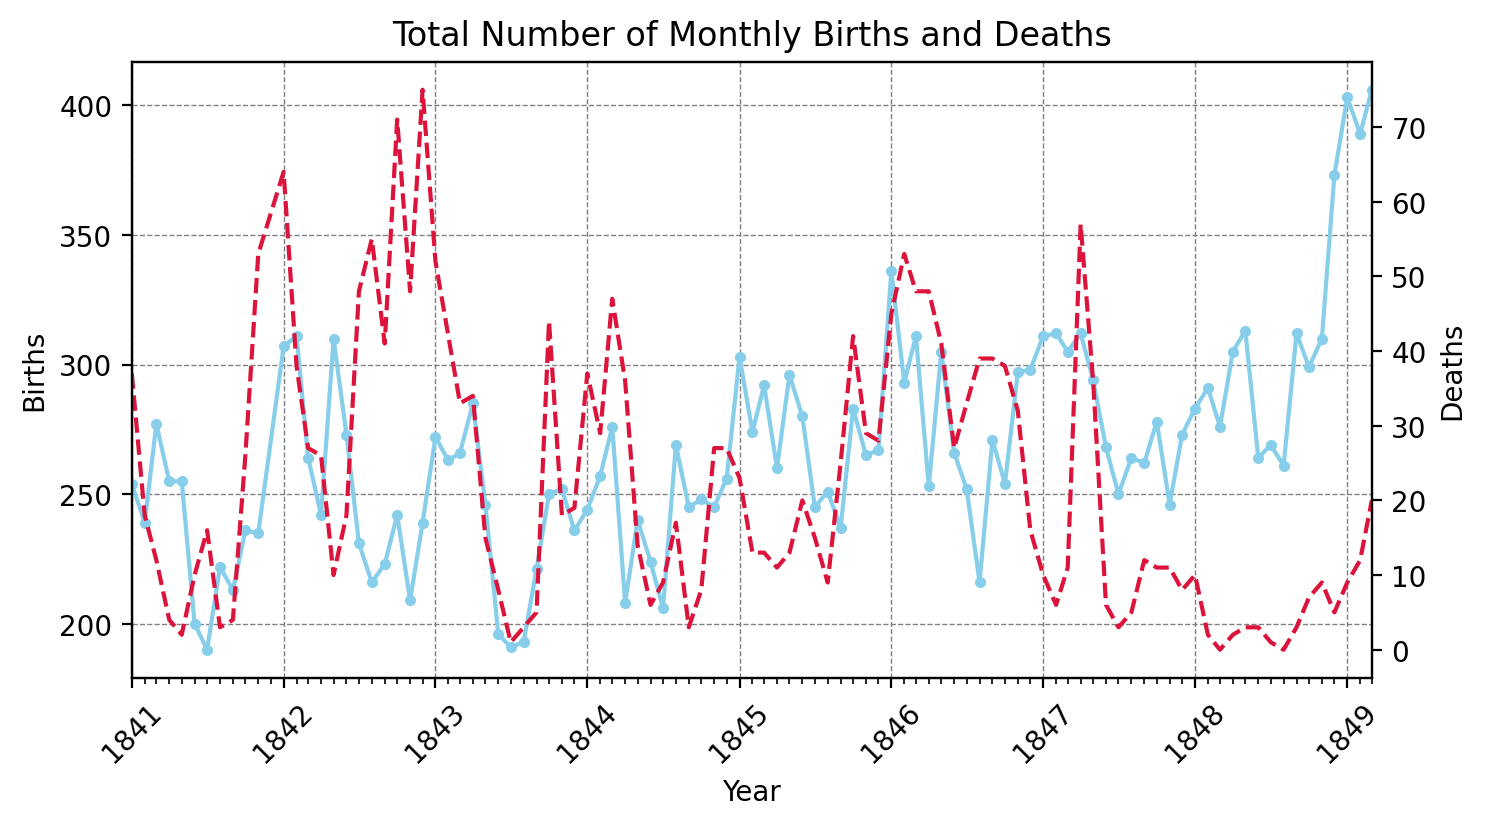

In [82]:
import matplotlib.dates as md
years = md.YearLocator()
months = md.MonthLocator()
years_format = md.DateFormatter("%Y")
plt.figure(figsize=(8,4), dpi=200)
plt.title("Total Number of Monthly Births and Deaths")
plt.xticks(rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color="grey", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)
ax1.set_xlabel("Year")
ax1.set_ylabel("Births")
ax2.set_ylabel("Deaths")
ax1.set_xlim(death_per_month.date.min(), death_per_month.date.max())
ax1.plot(death_per_month["date"],
         death_per_month["births"],
         c="skyblue",
         marker="."
         )
ax2.plot(death_per_month["date"],
         death_per_month["deaths"],
         c="crimson",
         linestyle="--"
         )

In [83]:
yearly_data_clinicwise = df_yearly.groupby(by=["clinic", "year"], as_index=False).agg({"deaths":pd.Series.sum, "births":pd.Series.sum})
yearly_data_clinicwise

,clinic,year,deaths,births
0,clinic 1,1841,237,3036
1,clinic 1,1842,518,3287
2,clinic 1,1843,274,3060
3,clinic 1,1844,260,3157
4,clinic 1,1845,241,3492
5,clinic 1,1846,459,4010
6,clinic 2,1841,86,2442
7,clinic 2,1842,202,2659
8,clinic 2,1843,164,2739
9,clinic 2,1844,68,2956


In [84]:
px.line(yearly_data_clinicwise,
        x=yearly_data_clinicwise.year,
        y=yearly_data_clinicwise.births,
        color=yearly_data_clinicwise.clinic,
        title="Number of Births vs Year"
        ).update_layout(xaxis_title="Year",
                        yaxis_title="Births")

In [85]:
px.line(yearly_data_clinicwise,
        x=yearly_data_clinicwise.year,
        y=yearly_data_clinicwise.deaths,
        color=yearly_data_clinicwise.clinic,
        title="Number of Deaths vs Year"
        ).update_layout(xaxis_title="Year",
                        yaxis_title="Deaths")

In [86]:
df_yearly["pct_deaths"] = df_yearly.deaths/df_yearly.births

In [87]:
clinic_1 = df_yearly[df_yearly["clinic"]=="clinic 1"]
avg_maternal_death_rate_in_clinic_1 = round(clinic_1.deaths.sum()/clinic_1.births.sum()*100,2)
clinic_2 = df_yearly[df_yearly["clinic"]=="clinic 2"]
avg_maternal_death_rate_in_clinic_2 = round(clinic_2.deaths.sum()/clinic_2.births.sum()*100,2)
print(f"Average death rate in clinic 1 is {avg_maternal_death_rate_in_clinic_1}%")
print(f"Average death rate in clinic 2 is {avg_maternal_death_rate_in_clinic_2}%")

Average death rate in clinic 1 is 9.92%
Average death rate in clinic 2 is 3.88%


In [88]:
px.line(df_yearly,
        x=df_yearly["year"],
        y=df_yearly["pct_deaths"],
        color=df_yearly["clinic"],
        title="Proportion of Yearly Deaths by Clinic"
        ).update_layout(xaxis_title="Year",
                        yaxis_title="Death proportion"
                        )

In [89]:
df_monthly["pct_deaths"] = df_monthly["deaths"] / df_monthly["births"]
df_monthly_prior_to_1847 = df_monthly[df_monthly["date"]<"1847-06-01"]
df_monthly_post_1847 = df_monthly[df_monthly["date"]>="1847-06-01"]

print(f"Average death rate prior to June 1847 is {round(df_monthly_prior_to_1847.deaths.mean(),2)}")
print(f"Average death rate post June 1847 is {round(df_monthly_post_1847.deaths.mean(),2)}")

Average death rate prior to June 1847 is 27.11
Average death rate post June 1847 is 6.45


In [90]:
df_monthly_prior_to_1847.set_index("date", inplace=True)
rolling_avg_death_rate = df_monthly_prior_to_1847.rolling(window=6).mean()
rolling_avg_death_rate

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.500000,29.000000,0.111277
1847-02-01,290.500000,23.500000,0.084390
1847-03-01,296.166667,18.833333,0.066415


Text(0, 0.5, 'Percentage of Deaths')

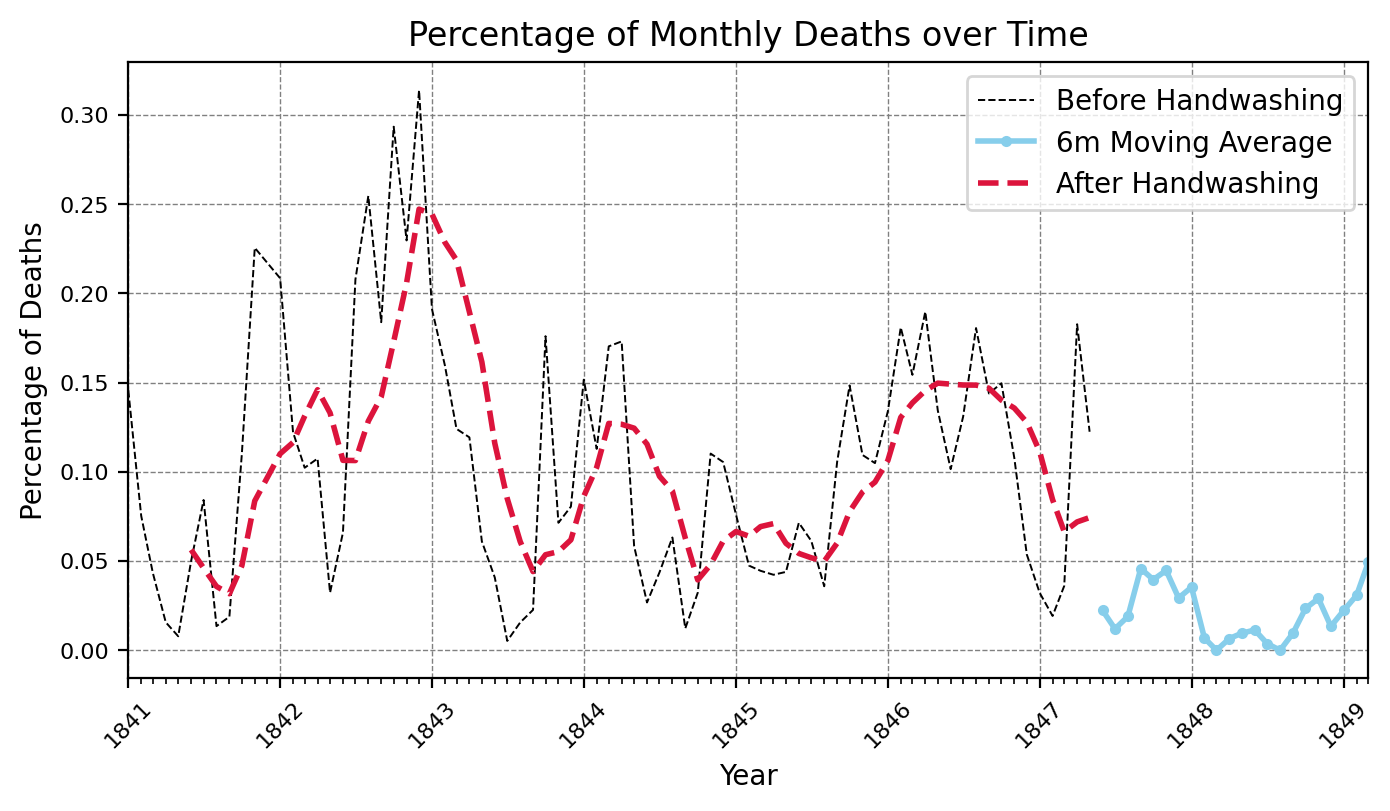

In [91]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Percentage of Monthly Deaths over Time")
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
ax1 = plt.gca()
ax1.grid(color="grey", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)
ax1.set_xlim(df_monthly_prior_to_1847.index.min(), df_monthly_post_1847.date.max())
bw_line, = ax1.plot(df_monthly_prior_to_1847.index,
         df_monthly_prior_to_1847["pct_deaths"],
         linestyle="--",
         c="black",
         linewidth=0.7,
         label="Before Handwashing"
         )
ma_line, = ax1.plot(df_monthly_post_1847["date"],
         df_monthly_post_1847["pct_deaths"],
         c="skyblue",
         marker=".",
         linewidth=2,
         label="6m Moving Average"
         )
aw_line, = ax1.plot(rolling_avg_death_rate.index,
         rolling_avg_death_rate.pct_deaths,
         c="crimson",
         linewidth=2,
         linestyle="--",
         label="After Handwashing"
         )
plt.legend(handles=[bw_line, ma_line, aw_line])
plt.xlabel("Year")
plt.ylabel("Percentage of Deaths")

In [92]:
print(f"Average percentage of monthly deaths before handwashing is : {round(df_monthly_prior_to_1847.pct_deaths.mean()*100,2)}%")
print(f"Average percentage of monthly deaths after handwashing was made obligatory is : {round(df_monthly_post_1847.pct_deaths.mean()*100,2)}%")

Average percentage of monthly deaths before handwashing is : 10.5%
Average percentage of monthly deaths after handwashing was made obligatory is : 2.11%


In [93]:
mean_diff = df_monthly_prior_to_1847.pct_deaths.mean() - df_monthly_post_1847.pct_deaths.mean()
print(f"Handwashing reduced the monthly proportion of dying by {round(mean_diff*100,2)}%")

Handwashing reduced the monthly proportion of dying by 8.4%


In [94]:
print(f"Handwashing have lowered the chances of dying {round(df_monthly_prior_to_1847.pct_deaths.mean()/df_monthly_post_1847.pct_deaths.mean(),2)}x times")

Handwashing have lowered the chances of dying 4.98x times


In [95]:
df_monthly["washing_hands"] = np.where(df_monthly.date < "1847-06-01", "No", "Yes")
px.box(df_monthly,
       x="washing_hands",
       y="pct_deaths",
       color="washing_hands",
       title="Statistics before and after Handwashing was mad obligatory"
       ).update_layout(xaxis_title="Washing Hands",
                       yaxis_title="Percentage of Monthly Deaths")

In [96]:
px.histogram(df_monthly,
             x="pct_deaths",
             color="washing_hands",
             nbins=30,
             opacity=0.6,
             barmode="overlay",
             histnorm="percent",
             marginal="box",
             title="Change in the Proportion of Deaths before and after Handwashing"
             ).update_layout(xaxis_title="Proportion of Monthly Deaths",
                             yaxis_title="Count")

Text(0.5, 0, 'Percentage Deaths')

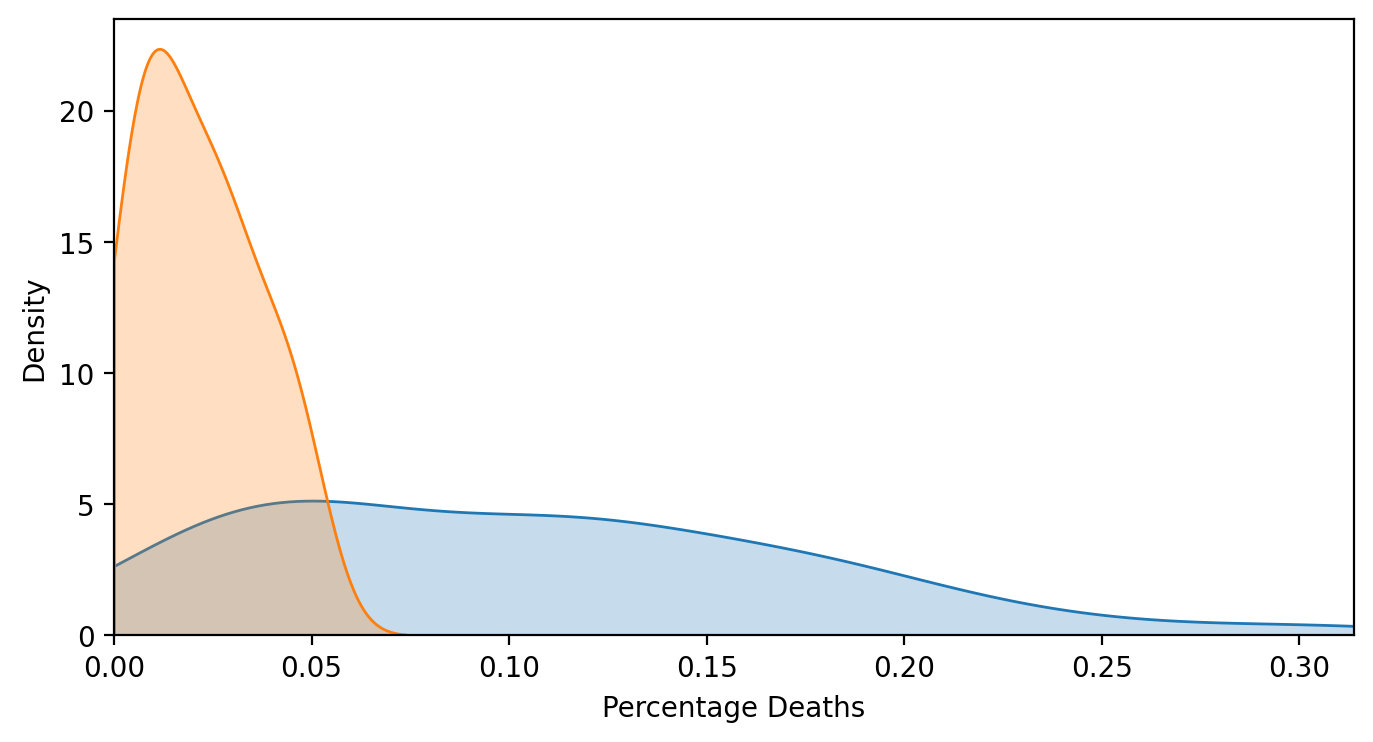

In [97]:
plt.figure(figsize=(8,4), dpi=200)
plt.xlim(0,df_monthly_prior_to_1847.pct_deaths.max())
sns.kdeplot(df_monthly_prior_to_1847.pct_deaths,
            fill=True,
            clip=(0,1),
            label="Percentage of Deaths before June 1847"
            )
sns.kdeplot(df_monthly_post_1847.pct_deaths,
            fill=True,
            clip=(0,1),
            label="Percentage of Deaths after June 1847"
            )
plt.xlabel("Percentage Deaths")

In [98]:
tstat, pstat = stats.ttest_ind(a=df_monthly_prior_to_1847.pct_deaths,
                               b=df_monthly_post_1847.pct_deaths)
print(f"T-value is {tstat:.10f}")
print(f"P-value is {pstat:.10f}")

T-value is 5.5116072113
P-value is 0.0000002985


In [99]:
print("The P-value is << 1, hence the difference in means is highly statistically significant.")

The P-value is << 1, hence the difference in means is highly statistically significant.
